In [ ]:
#!/hetghome/hetgsoft/anaconda3/bin/python3.9
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
#from scipy.fft import fft, fftfreq
from scipy.fft import fft, fftfreq, fftshift
import math as m
import math
"""from scipy.optimize import fsolve
from scipy import linalg"""
import csv
import pandas as pd
import sys
import numpy as np
import os
from scipy.integrate import RK45
import time
import seaborn as sns
from os.path import exists
from matplotlib import rc
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
rc('font',**{'family':'serif','serif':['Roman'],'size':20})
plt.rc('legend', fontsize=10) 
plt.rc('xtick', labelsize=15)    
plt.rc('ytick', labelsize=15)
rc('text', usetex=True)
#############################################################
from configparser import ConfigParser
########################################
path = os.getcwd()
print(path)
for h in os.listdir(path):
    if 'sajm' not in h:
        #print('flat conti')
        continue
    if 'NN' not in h:
        #print('n1 conti')
        continue
    """if 'N1_As_'  not in h:
        #print('pb conti')
        continue"""
    if 'yvymys' not in h:
        #print('pb conti')
        continue
    if 'Z01'  not in h:
        #print('inm conti')
        continue
    # if 'vdp' not in h:
    #     continue
    
    cc=0
    if 'jpg' in h:
        continue
    if '_mu_' in h:
        print(h)
        if 'Lmu' in h:
            mu=h[h.find('mu_')+3:h.find('_Lmu')]
        else:
            mu=h[h.find('mu_')+3:h.find('_ar')]
        PT = []
        PEE = []
        Nz=0
        pign = '1234'
        for i in os.listdir(path+'/'+h):
            if '48' in i:
                print('48 conti')
                continue
            if os.path.isfile(path+'/'+h+'/'+i):
                continue
            """if dats ==0:
                print('das0 conti)
                continue"""
            #print(i)
            #dira = 
            if 'jpg' in i:
                continue
            """if '3000' not in i:
                print('3000 conti' )
                continue"""
            """if '/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fv_pui_10_non_mu_200_ar_0.7_zlm_1/3000_2_0.2' !=path+'/'+h+'/'+i:
                    print(h)
                    print(i)
                    print('test conti      test conti')
                    continue
            else:
                print('YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY')"""
            if os.path.isdir(path+'/'+h+'/'+i):
                ###########################################
                confn = path+'/'+h+'/'+i+'/job.config'
                f=open(confn,'r')
                for line in f.readlines():
                    if "dz" in line:
                        dz=float(line[line.find(":")+1:])
                        #print(line)
                        #print(dz)
                #sys.exit()
                ############################################
                Para = i.split("_")
                print('Para i',Para)
                Nz = float(Para[0])
                for k in os.listdir(path+'/'+h):
                    if os.path.isfile(path+'/'+h+'/'+k):
                        continue
                    dats=0
                    for l in os.listdir(path+'/'+h+'/'+k):
                        if 'dat' in l:
                            dats+=1
                    Para = k.split("_")
                    print('Para k',Para)
                    if 'jpg' in k:
                        continue
                    if Nz==0:
                        print('nz 0')
                    else:
                        """if Nz==1:
                            Nz = float(Para[0])"""
                        if Nz != float(Para[0]):
                            print(Nz,'pre Nz')
                            print(float(Para[0]))
                            print(' not same')
                            #Nz = float(Para[0])
                            continue   
                        else:
                            print(Nz,'pre Nz')
                            print(float(Para[0]))
                            print('same')
                    #print(i)
                    #dira = 
                    if os.path.isdir(path+'/'+h+'/'+k):
                        Nz = float(Para[0])
                        Nvz = float(Para[1])
                        CFL = float(Para[2])
                        #print(path+'/'+h+'/'+k)
                        if os.path.exists(pign):
                            print('pig exit conti')
                            #continue
                        #print(path+'/'+h+'/'+i)
                        #print(i,'i')
                        #DATA=np.fromfile(path+'/'+h+'/'+i+'/'+i+'_survival_probability.dat')
                        #print(DATA)
                        Time = []
                        A_O= []
                        FFR = pd.DataFrame({'A' : []})
                        ft = 0
                        csvfn = path+'/'+h+'/'+k+'/fft_im_off_'+k+'.csv'
                        if dats==0:
                            if os.path.exists(csvfn):
                                os.remove(csvfn)
                                print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>     csv exit del conti')
                                continue
                            print('not fin conti')
                            continue
                        else:
                            if os.path.exists(csvfn):
                                print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>     csv exit conti')
                                continue
                        for l in os.listdir(path+'/'+h+'/'+k):
                            if 'dat' in l:
                                if '_rho' in l:
                                    #print(l)
                                    fn = path+'/'+h+'/'+k+'/'+l
                                    #fn = path+'/'+h+'/'+k+'/'+'48000_2_0.4_rho_0.dat'
                                    itr=float(l[l.find("_rho_")+5:l.find(".dat")])
                                    DATA = pd.read_csv(fn, sep='\t',names=["Z", "vz", "rho_ee", "rho_xx", "Re[rho_ex]", "Im[rho_ex]", "brho_ee", "brho_xx", "Re[brho_ex]", "Im[brho_ex]"])
                                    #DATA["sqr"]=DATA["Re[rho_ex]"] * DATA["Re[rho_ex]"] + DATA["Im[rho_ex]"] * DATA["Im[rho_ex]"] + DATA["Re[brho_ex]"] * DATA["Re[brho_ex]"] + DATA["Im[brho_ex]"] * DATA["Im[brho_ex]"]
                                    DATA["re"]=DATA["Re[rho_ex]"]#+DATA["Re[brho_ex]"]
                                    DATA["im"]=DATA["Im[rho_ex]"]#+DATA["Im[brho_ex]"]
                                    #DATA = pd.read_csv(path+'/'+i+'/'+i+'_conserved_quantities.dat')
                                    #ave_off=DATA["sqr"].mean()
                                    num = DATA.shape[0]
                                    #print(DATA)
                                    #print(DATA.loc[0,:])
                                    #print(DATA.shape[0])
                                    #print(dz,'dz')
                                    #sys.exit()
                                    FX = []
                                    FY = []
                                    for m in range(num):
                                        #print(m%2)
                                        if m%2 ==1:
                                            FX.append(DATA.loc[m,'Z'])
                                            """if abs(DATA.loc[m,'Z'])<1.0*dz:
                                                FY.append(1.0)
                                            else:
                                                FY.append(0)"""
                                            FY.append((DATA.loc[m,'re']+DATA.loc[m,'re']+1j * float(DATA.loc[m,'im']+DATA.loc[m-1,'im']))/2)
                                    #print(len(FX))
                                    #print(len(FY))
                                    #plt.subplot(2,1,1)
                                    #plt.scatter(FX,FY,s=0.5)
                                    #plt.xlim(-0.1,0.1)
                                    #plt.show()
                                    #plt.close('all')
                                    YFp = fftshift(fft(FY))
                                    YF = 1/(num/2) * np.abs(YFp)
                                    XF = fftshift(fftfreq(int(num/2),dz))#[:int(num/2)//2]
                                    #plt.plot(XF,YF)
                                    #plt.show()
                                    #sys.exit()
                                    if ft==0:
                                        FFR=pd.DataFrame(XF,columns=['k'])
                                        FFR.insert(1,itr * CFL*dz,YF)
                                    else:
                                        FFR.insert(1,itr * CFL*dz,YF)
                                    ft+=1
                                    #print(XF)
                                    #plt.scatter(XF,2/num*np.abs(YF[0:num//2]))
                                    """plt.subplot(2,1,2)
                                    plt.plot(XF,2/int(num/2)*np.abs(YF[0:int(num/2)//2]))
                                    #plt.yscale('log')
                                    plt.show()
                                    sys.exit()"""
                                    #print(ave_off)
                                    #Time.append(itr * CFL*dz)
                                    #A_O.append(ave_off)
                                    #sys.exit()
                                    """DATA = DATA.drop(index=0)
                                    toflo = {'time':float}
                                    DATA = DATA.astype(toflo)"""
                        
                        print(csvfn)
                        FFR.to_csv(csvfn, index=False)
                        #sys.exit()
                        #plt.scatter(Time,A_O,s=0.7,label=str(int(Nz))+', '+str(dz)[:7]+', '+str(CFL),c='C'+str(cc))
                        #plt.yscale('log')
                        #plt.show()
                        #sys.exit()#
                        #cc+=1
                        
                        #DATA.plot(x="time",y="Pbee")
                        """if 'tur' in h:
                            plt.title("Averaged survival probability (tur) "+i)
                        if 'non' in h:
                            plt.title("Averaged survival probability (w/o tur) "+i)"""
                        #DATA.plot()
                        #
                        #plt.show()
                        #plt.plot()
                        #print('cc',cc)
                    """if cc>2:
                        print('break')
                        break"""
                
                """pign = path+'/'+h+'/'+h+'_dz_'+str(dz)[:8]+'_ave_off_compaare.jpg'
                print('pign', pign)
                plt.title('$<|\rho_{ex}|>, \omega=$'+(str(1/float(mu)))[:5]+' [Nz,dz,CFL]')
                plt.legend()
                plt.yscale('log')
                print('show')
                #plt.show()
                #sys.exit()
                plt.savefig(pign)
                plt.close('all')"""
                print('-------------------------------------------------------------------------------------------------')
                #Nz = 1
                #Nz = float(Para[0])


/hetghome/jordan/Cose_nu/research_experience_program/COSEnu
fd_sajm_vip_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1
Para i ['100', '2', '1e-05']
Para k ['100', '2', '1e-05']
100.0 pre Nz
100.0
same
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/100_2_1e-05/fft_im_off_100_2_1e-05.csv
Para k ['1', '2', '1e-05']
100.0 pre Nz
1.0
 not same
Para k ['1', '2', '0.0001']
100.0 pre Nz
1.0
 not same
Para k ['10', '2', '0.0001']
100.0 pre Nz
10.0
 not same
Para k ['1000', '2', '1e-05']
100.0 pre Nz
1000.0
 not same
Para k ['10', '2', '1e-05']
100.0 pre Nz
10.0
 not same
Para k ['500', '2', '0.0001']
100.0 pre Nz
500.0
 not same
Para k ['1000', '2', '0.0001']
100.0 pre Nz
1000.0
 not same
Para k ['2000', '2', '1e-05']
100.0 pre Nz
2000.0
 not same
Para k ['100', '2', '0.0001']
100.0 pre Nz
100.0
same
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/

100_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/100_2_1e-05
Para i ['100', '2', '1e-05']


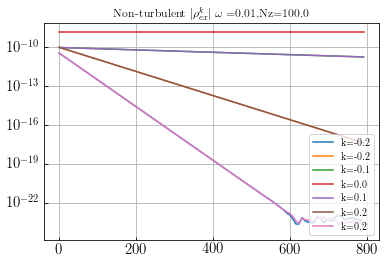

-------------------------------------------------------------------------------------------------
1_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/1_2_1e-05
Para i ['1', '2', '1e-05']
1_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/1_2_0.0001
Para i ['1', '2', '0.0001']
10_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/10_2_0.0001
Para i ['10', '2', '0.0001']


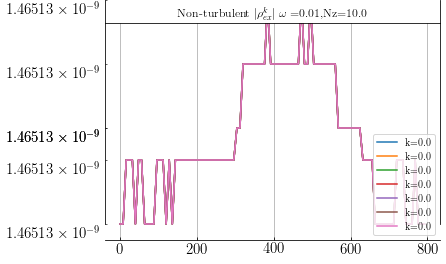

-------------------------------------------------------------------------------------------------
1000_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/1000_2_1e-05
Para i ['1000', '2', '1e-05']


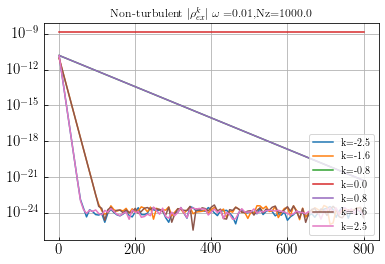

-------------------------------------------------------------------------------------------------
10_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/10_2_1e-05
Para i ['10', '2', '1e-05']


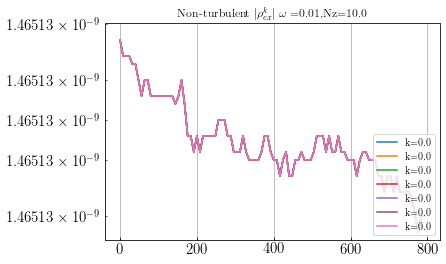

-------------------------------------------------------------------------------------------------
500_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/500_2_0.0001
Para i ['500', '2', '0.0001']


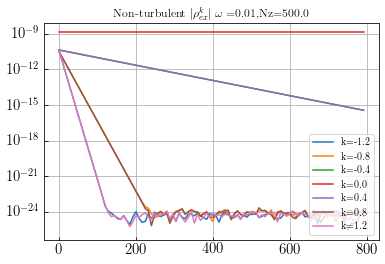

-------------------------------------------------------------------------------------------------
1000_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/1000_2_0.0001
Para i ['1000', '2', '0.0001']


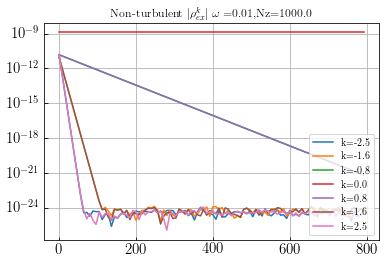

-------------------------------------------------------------------------------------------------
2000_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/2000_2_1e-05
Para i ['2000', '2', '1e-05']
no csv conti
100_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/100_2_0.0001
Para i ['100', '2', '0.0001']


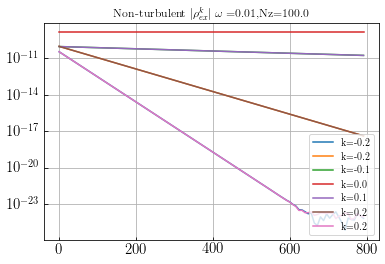

-------------------------------------------------------------------------------------------------
2000_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/2000_2_0.0001
Para i ['2000', '2', '0.0001']


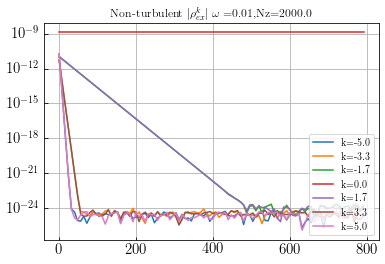

-------------------------------------------------------------------------------------------------
500_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/500_2_1e-05
Para i ['500', '2', '1e-05']


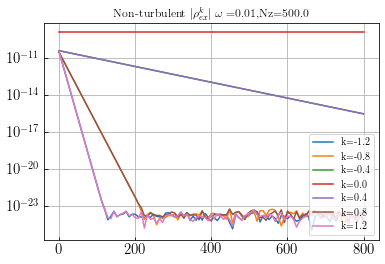

-------------------------------------------------------------------------------------------------
100_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/100_2_1e-05
Para i ['100', '2', '1e-05']


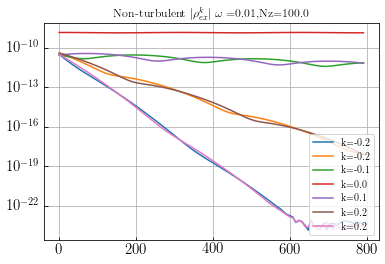

-------------------------------------------------------------------------------------------------
1_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/1_2_1e-05
Para i ['1', '2', '1e-05']
1_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/1_2_0.0001
Para i ['1', '2', '0.0001']
10_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/10_2_0.0001
Para i ['10', '2', '0.0001']


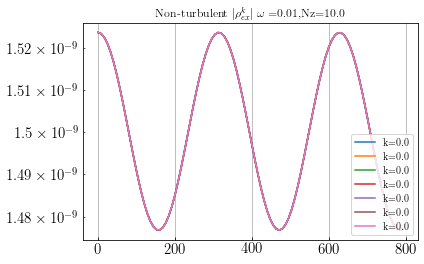

-------------------------------------------------------------------------------------------------
1000_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/1000_2_1e-05
Para i ['1000', '2', '1e-05']


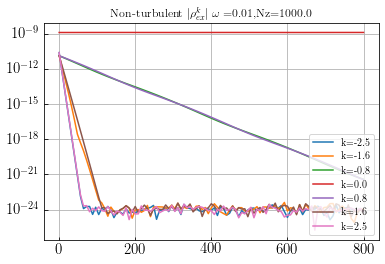

-------------------------------------------------------------------------------------------------
10_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/10_2_1e-05
Para i ['10', '2', '1e-05']


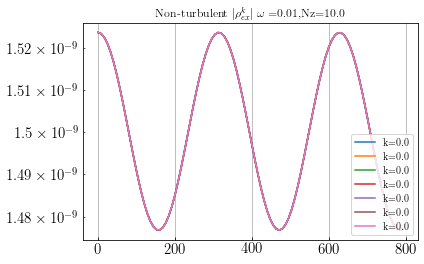

-------------------------------------------------------------------------------------------------
500_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/500_2_0.0001
Para i ['500', '2', '0.0001']


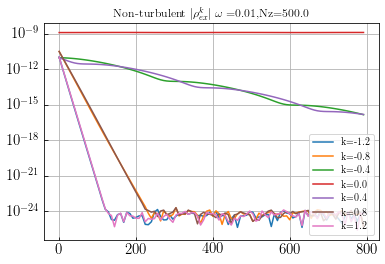

-------------------------------------------------------------------------------------------------
1000_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/1000_2_0.0001
Para i ['1000', '2', '0.0001']


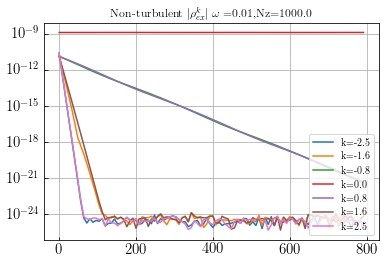

-------------------------------------------------------------------------------------------------
2000_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/2000_2_1e-05
Para i ['2000', '2', '1e-05']
no csv conti
100_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/100_2_0.0001
Para i ['100', '2', '0.0001']


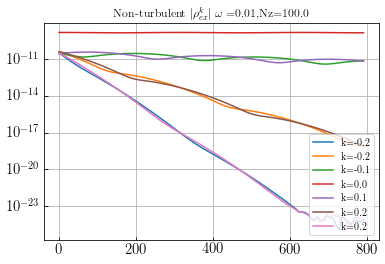

-------------------------------------------------------------------------------------------------
2000_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/2000_2_0.0001
Para i ['2000', '2', '0.0001']


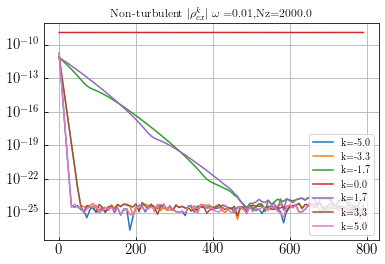

-------------------------------------------------------------------------------------------------
500_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/500_2_1e-05
Para i ['500', '2', '1e-05']


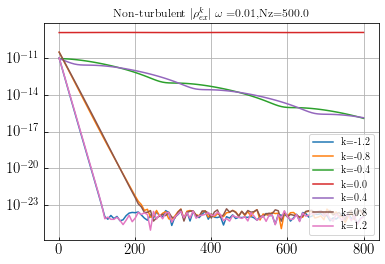

-------------------------------------------------------------------------------------------------
100_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/100_2_1e-05
Para i ['100', '2', '1e-05']


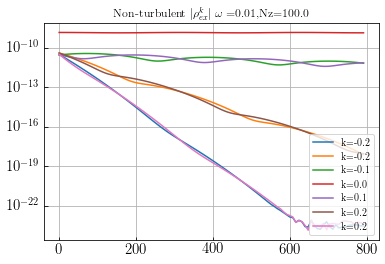

-------------------------------------------------------------------------------------------------
1_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/1_2_1e-05
Para i ['1', '2', '1e-05']
1_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/1_2_0.0001
Para i ['1', '2', '0.0001']
10_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/10_2_0.0001
Para i ['10', '2', '0.0001']


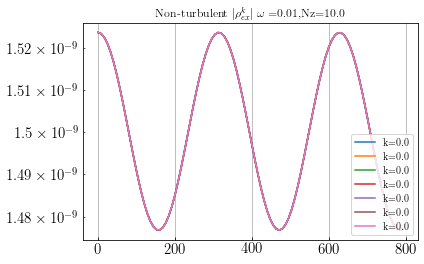

-------------------------------------------------------------------------------------------------
1000_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/1000_2_1e-05
Para i ['1000', '2', '1e-05']


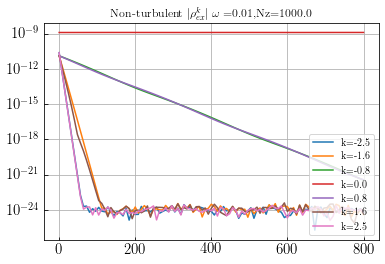

-------------------------------------------------------------------------------------------------
10_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/10_2_1e-05
Para i ['10', '2', '1e-05']


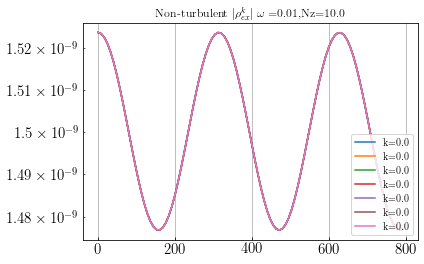

-------------------------------------------------------------------------------------------------
500_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/500_2_0.0001
Para i ['500', '2', '0.0001']


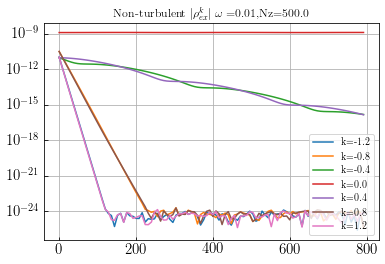

-------------------------------------------------------------------------------------------------
1000_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/1000_2_0.0001
Para i ['1000', '2', '0.0001']


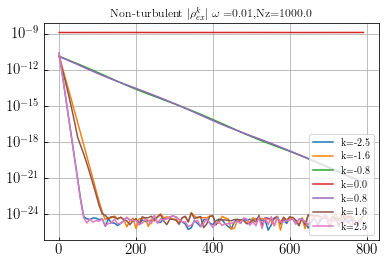

-------------------------------------------------------------------------------------------------
2000_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/2000_2_1e-05
Para i ['2000', '2', '1e-05']
no csv conti
100_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/100_2_0.0001
Para i ['100', '2', '0.0001']


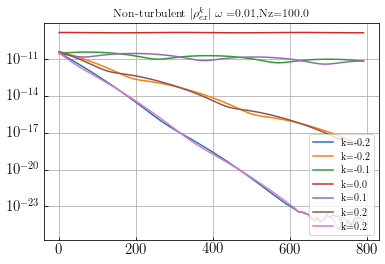

-------------------------------------------------------------------------------------------------
2000_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/2000_2_0.0001
Para i ['2000', '2', '0.0001']


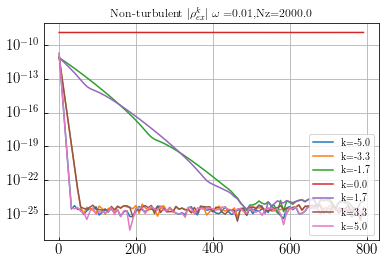

-------------------------------------------------------------------------------------------------
500_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/500_2_1e-05
Para i ['500', '2', '1e-05']


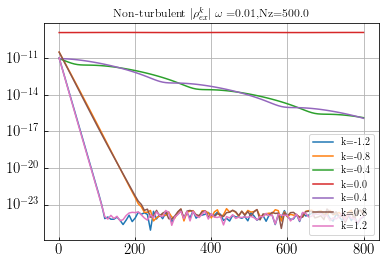

-------------------------------------------------------------------------------------------------
100_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/100_2_1e-05
Para i ['100', '2', '1e-05']


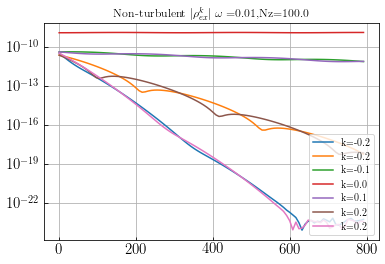

-------------------------------------------------------------------------------------------------
1_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/1_2_1e-05
Para i ['1', '2', '1e-05']
1_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/1_2_0.0001
Para i ['1', '2', '0.0001']
10_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/10_2_0.0001
Para i ['10', '2', '0.0001']


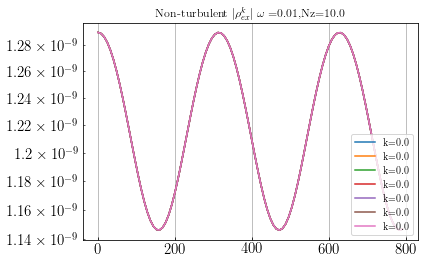

-------------------------------------------------------------------------------------------------
1000_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/1000_2_1e-05
Para i ['1000', '2', '1e-05']
no csv conti
10_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/10_2_1e-05
Para i ['10', '2', '1e-05']


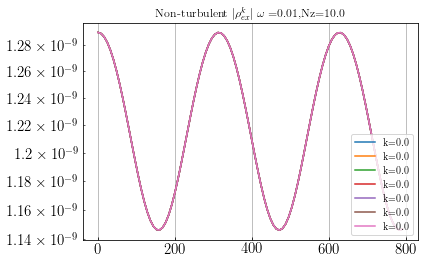

-------------------------------------------------------------------------------------------------
500_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/500_2_0.0001
Para i ['500', '2', '0.0001']


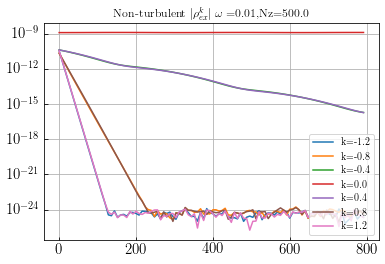

-------------------------------------------------------------------------------------------------
1000_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/1000_2_0.0001
Para i ['1000', '2', '0.0001']
no csv conti
2000_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/2000_2_1e-05
Para i ['2000', '2', '1e-05']
no csv conti
100_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/100_2_0.0001
Para i ['100', '2', '0.0001']


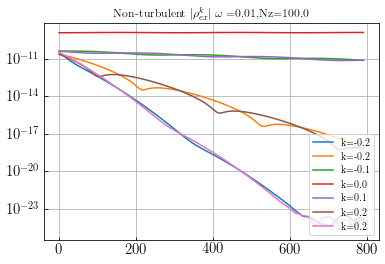

-------------------------------------------------------------------------------------------------
2000_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/2000_2_0.0001
Para i ['2000', '2', '0.0001']
no csv conti
500_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/500_2_1e-05
Para i ['500', '2', '1e-05']
no csv conti
100_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_nnm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/100_2_1e-05
Para i ['100', '2', '1e-05']
no csv conti
1_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vdp_yvymys_nnm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/1_2_1e-05
Para i ['1', '2', '1e-05']
1_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/f

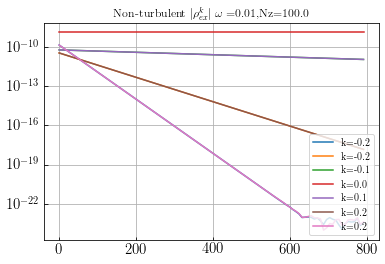

-------------------------------------------------------------------------------------------------
1_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/1_2_1e-05
Para i ['1', '2', '1e-05']
1_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/1_2_0.0001
Para i ['1', '2', '0.0001']
10_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/10_2_0.0001
Para i ['10', '2', '0.0001']


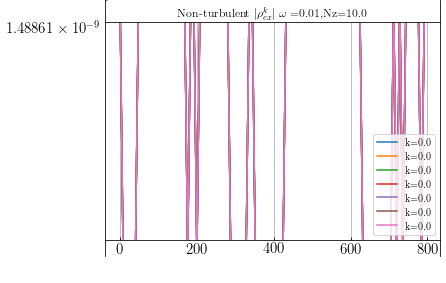

-------------------------------------------------------------------------------------------------
1000_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/1000_2_1e-05
Para i ['1000', '2', '1e-05']
no csv conti
10_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/10_2_1e-05
Para i ['10', '2', '1e-05']


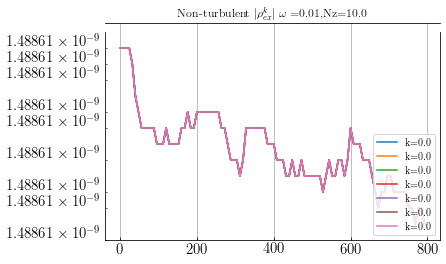

-------------------------------------------------------------------------------------------------
500_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/500_2_0.0001
Para i ['500', '2', '0.0001']


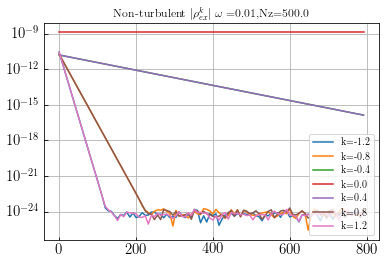

-------------------------------------------------------------------------------------------------
1000_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/1000_2_0.0001
Para i ['1000', '2', '0.0001']


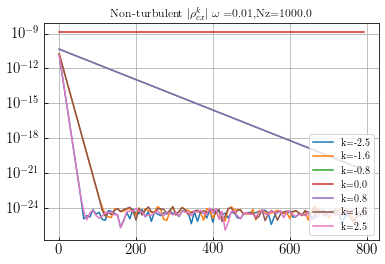

-------------------------------------------------------------------------------------------------
2000_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/2000_2_1e-05
Para i ['2000', '2', '1e-05']
no csv conti
100_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/100_2_0.0001
Para i ['100', '2', '0.0001']


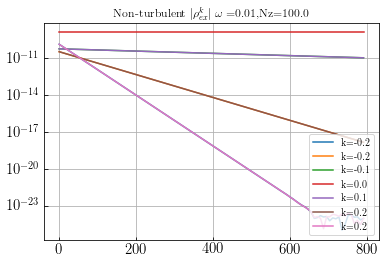

-------------------------------------------------------------------------------------------------
2000_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/2000_2_0.0001
Para i ['2000', '2', '0.0001']


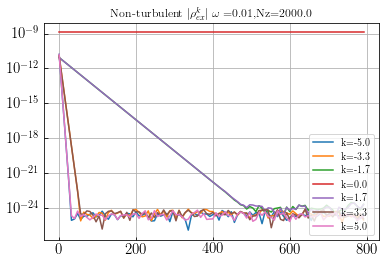

-------------------------------------------------------------------------------------------------
500_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/500_2_1e-05
Para i ['500', '2', '1e-05']


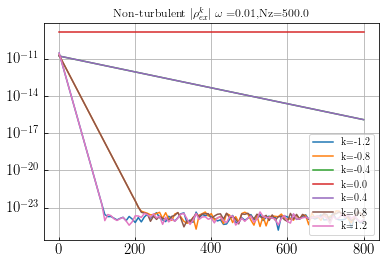

-------------------------------------------------------------------------------------------------
100_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/100_2_1e-05
Para i ['100', '2', '1e-05']


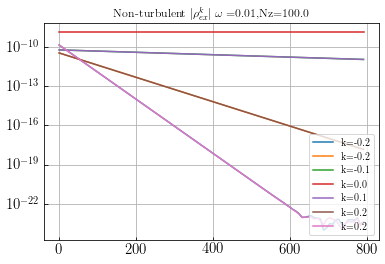

-------------------------------------------------------------------------------------------------
1_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/1_2_1e-05
Para i ['1', '2', '1e-05']
1_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/1_2_0.0001
Para i ['1', '2', '0.0001']
10_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/10_2_0.0001
Para i ['10', '2', '0.0001']


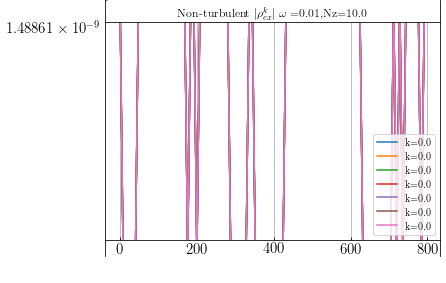

-------------------------------------------------------------------------------------------------
1000_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/1000_2_1e-05
Para i ['1000', '2', '1e-05']
no csv conti
10_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/10_2_1e-05
Para i ['10', '2', '1e-05']


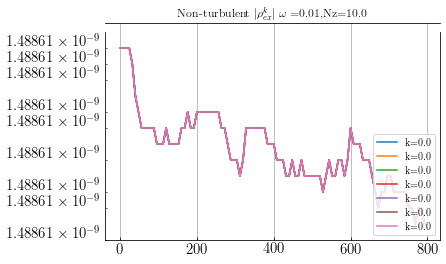

-------------------------------------------------------------------------------------------------
500_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/500_2_0.0001
Para i ['500', '2', '0.0001']


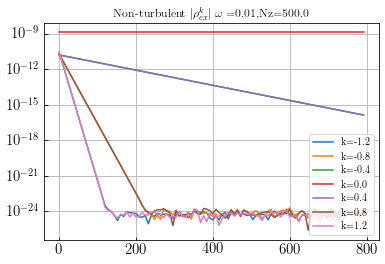

-------------------------------------------------------------------------------------------------
1000_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/1000_2_0.0001
Para i ['1000', '2', '0.0001']


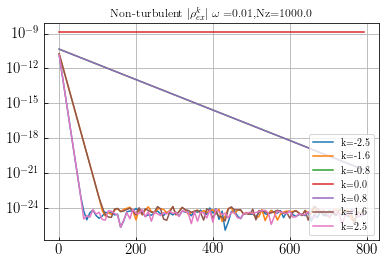

-------------------------------------------------------------------------------------------------
2000_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/2000_2_1e-05
Para i ['2000', '2', '1e-05']
no csv conti
100_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/100_2_0.0001
Para i ['100', '2', '0.0001']


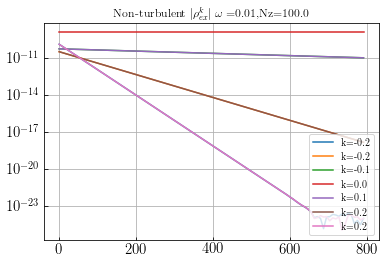

-------------------------------------------------------------------------------------------------
2000_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/2000_2_0.0001
Para i ['2000', '2', '0.0001']
no csv conti
500_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_inm_NN_A2_tur3_mu_100_Lmu_300_ar_0.7_run1/500_2_1e-05
Para i ['500', '2', '1e-05']
no csv conti
100_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/100_2_1e-05
Para i ['100', '2', '1e-05']


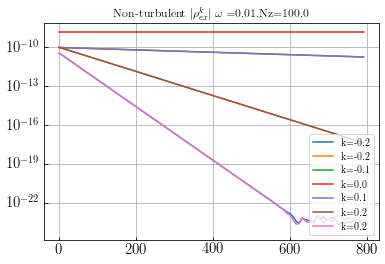

-------------------------------------------------------------------------------------------------
1_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/1_2_1e-05
Para i ['1', '2', '1e-05']
1_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/1_2_0.0001
Para i ['1', '2', '0.0001']
10_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/10_2_0.0001
Para i ['10', '2', '0.0001']


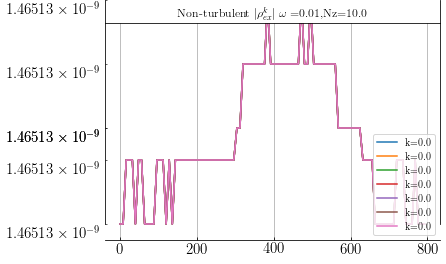

-------------------------------------------------------------------------------------------------
1000_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/1000_2_1e-05
Para i ['1000', '2', '1e-05']
no csv conti
10_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/10_2_1e-05
Para i ['10', '2', '1e-05']


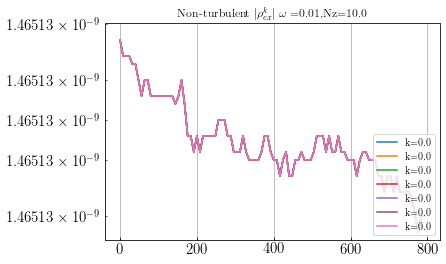

-------------------------------------------------------------------------------------------------
500_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/500_2_0.0001
Para i ['500', '2', '0.0001']


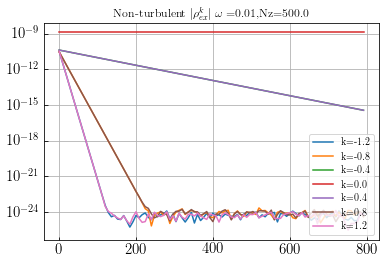

-------------------------------------------------------------------------------------------------
1000_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/1000_2_0.0001
Para i ['1000', '2', '0.0001']


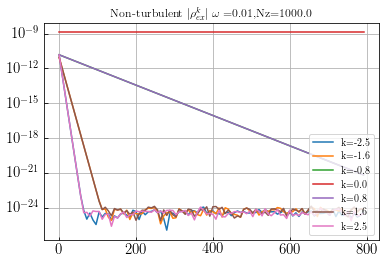

-------------------------------------------------------------------------------------------------
2000_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/2000_2_1e-05
Para i ['2000', '2', '1e-05']
no csv conti
100_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/100_2_0.0001
Para i ['100', '2', '0.0001']


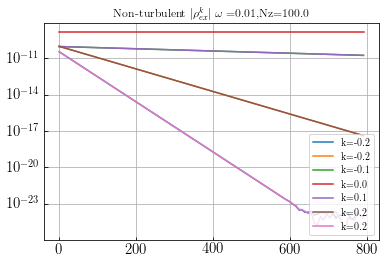

-------------------------------------------------------------------------------------------------
2000_2_0.0001
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/2000_2_0.0001
Para i ['2000', '2', '0.0001']


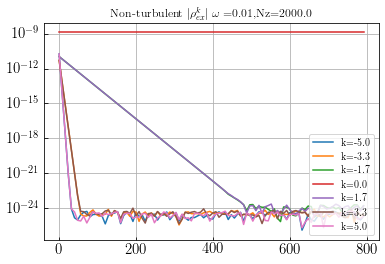

-------------------------------------------------------------------------------------------------
500_2_1e-05
------------------
/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_sajm_vip_yvymys_nnm_NN_Asl_non_mu_100_Lmu_300_ar_0.7_run1/500_2_1e-05
Para i ['500', '2', '1e-05']


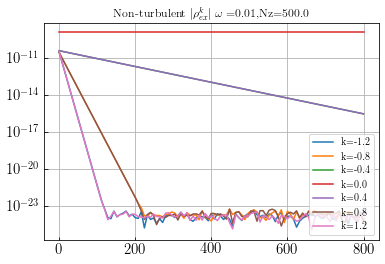

-------------------------------------------------------------------------------------------------


In [2]:
#!/hetghome/hetgsoft/anaconda3/bin/python3.9
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.fft import fft, fftfreq
import math as m
import math
"""from scipy.optimize import fsolve
from scipy import linalg"""
import csv
import pandas as pd
import sys
import numpy as np
import os
from scipy.integrate import RK45
import time
import seaborn as sns
from os.path import exists
from matplotlib import rc
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
rc('font',**{'family':'serif','serif':['Roman'],'size':20})
plt.rc('legend', fontsize=10) 
plt.rc('xtick', labelsize=15)    
plt.rc('ytick', labelsize=15)
rc('text', usetex=True)
#############################################################
from configparser import ConfigParser
########################################
path = os.getcwd()
#print(path)
for h in os.listdir(path):
    if 'sajm' not in h:
        #print('flat conti')
        continue
    if 'NN' not in h:
        #print('n1 conti')
        continue
    """if 'N1_As_'  not in h:
        #print('pb conti')
        continue"""
    if 'yvymys' not in h:
        #print('pb conti')
        continue
    """if 'nnm'  not in h:
        #print('inm conti')
        continue
    if 'vdp' not in h:
        continue"""
    cc=0
    if 'jpg' in h:
        continue
    if '_mu_' in h:
        #print(h)
        if 'Lmu' in h:
            mu=h[h.find('mu_')+3:h.find('_Lmu')]
        else:
            mu=h[h.find('mu_')+3:h.find('_ar')]
        PT = []
        PEE = []
        Nz=0
        
        for i in os.listdir(path+'/'+h):
            if os.path.isfile(path+'/'+h+'/'+i):
                continue
            print(i)
            print('------------------')
            #dira = 
            if 'jpg' in i:
                continue
            """if '3000' not in i:
                print('3000 conti' )
                continue"""
            if os.path.isdir(path+'/'+h+'/'+i):
                """if '48' in i:
                    print('48 conti')
                    continue"""
                print(path+'/'+h+'/'+i)
                pign = path+'/'+h+'/'+i+'/fft_im_off_'+i+'_st.jpg'
                if os.path.exists(pign)==True:
                    print('pig exi conti')
                    #continue
                """if '/hetghome/jordan/Cose_nu/research_experience_program/COSEnu/fd_pui_10_non_mu_100_ar_0.7_zlm_1/3000_2_0.4' !=path+'/'+h+'/'+i:
                    print('test conti')
                    print(h)
                    print(i)
                    print('>>>>>>>>>>>>>>>>>>>>>>')
                    continue"""
                ###########################################
                confn = path+'/'+h+'/'+i+'/job.config'
                f=open(confn,'r')
                for line in f.readlines():
                    if "dz" in line:
                        dz=float(line[line.find(":")+1:])
                        #print(line)
                        #print(dz)
                #sys.exit()
                ############################################
                Para = i.split("_")
                print('Para i',Para)
                Nz = float(Para[0])
                Nvz = float(Para[1])
                CFL = float(Para[2])
                if Nz==1:
                    continue
                csvn = path+'/'+h+'/'+i+'/fft_im_off_'+i+'.csv'
                if os.path.exists(csvn)==False:
                    print('no csv conti')
                    continue
                DATA = pd.read_csv(csvn)
                #print(DATA)
                #sys.exit()
                #print(DATA.columns[0])
                
                Time = list(map(float,DATA.columns[1:]))
                sTime = sorted(Time)
                sTimeid=sorted(range(len(Time)), key=lambda k: Time[k])
                pdt = int(len(Time)/5)
                # for j in range(5):
                #     print(Time[pdt*j])
                #     print(sTime[pdt*j])
                # #sys.exit()
                # print(Time)
                # print(sTime)
                # print(sTimeid)
                # #sys.exit()
                QKS = []
                LBK = []#label k
                ptnum = 7
                pti = int(DATA.shape[0]/(ptnum-1))-1
                ptc=int(DATA.shape[0]/2)
                for j in range(ptnum):
                    #print(pti*j)
                    #print(ptc+(j-ptnum//2)*pti)
                    #print(ptc)
                    QKS.append((DATA.loc[ptc+(j-ptnum//2)*pti,:].values.flatten().tolist())[1:])
                    LBK.append(round(DATA.loc[ptc+(j-ptnum//2)*pti,'k'],1))
                sQKS=[]
                for j in range(ptnum):
                    sQKS.append([])
                for j in range(ptnum):#range(len(QKS[0])):
                    for k in sTimeid:
                        sQKS[j].append((QKS[j])[k])
                cc=0
                for j in range(ptnum):
                    #plt.scatter(sTime,sQKS[j],s=0.9,c='C'+str(cc),label='k='+str(LBK[j]))
                    plt.plot(sTime,sQKS[j],c='C'+str(cc),label='k='+str(LBK[j]))
                    cc+=1
                
                plt.yscale('log')
                plt.legend(loc='lower right')
                plt.title(r'Non-turbulent $|\rho_{ex}^{k}|$ $\omega=$'+str(1/float(mu))+',Nz='+str(Nz))
                plt.grid()
                plt.show()
                #sys.exit()
                #plt.savefig(pign,dpi=500)
                #plt.show()
                plt.close('all')
                #sys.exit()
                print('-------------------------------------------------------------------------------------------------')
                #Nz = 1
                #Nz = float(Para[0])
